In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
column_names = [
    "Water",
    "Food energy",
    "Protein",
    "Total lipids (fat)",
    "Ash",
    "Carbohydrate",
    "Total dietary fiber",
    "Total sugars",
    "Calcium",
    "Iron",
    "Magnesium",
    "Phosphorus",
    "Potassium",
    "Sodium",
    "Zinc",
    "Copper",
    "Manganese",
    "Selenium",
    "Vitamin C",
    "Thiamin",
    "Riboflavin",
    "Niacin",
    "Pantothenic acid",
    "Vitamin B6",
    "Total Folate",
    "Folic acid",
    "Food Folate",
    "Folate",
    "Vitamin B12",
    "Vitamin A",
    "VitA",
    "Retinol",
    "Vitamin E",
    "Vitamin K",
    "Alpha-carotene",
    "Beta-carotene",
    "Beta-cryptoxanthin",
    "Lycopene",
    "Lutein + zeaxanthin",
    "Saturated fatty acid",
    "Monounsaturated fatty acids",
    "Polyunsaturated fatty acids",
    "Cholesterol",
    "1st household weight from Weight file",
    "2nd household weight from Weight file",
    "Percent refuse"
]

In [29]:
x1 = pd.read_csv("x1.csv", header=None, names=column_names)
x2 = pd.read_csv("x2.csv", header=None, names=column_names)
x3 = pd.read_csv("x3.csv", header=None, names=column_names)

In [30]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Water                                  898 non-null    float64
 1   Food energy                            898 non-null    float64
 2   Protein                                898 non-null    float64
 3   Total lipids (fat)                     898 non-null    float64
 4   Ash                                    898 non-null    float64
 5   Carbohydrate                           898 non-null    float64
 6   Total dietary fiber                    898 non-null    float64
 7   Total sugars                           898 non-null    float64
 8   Calcium                                898 non-null    float64
 9   Iron                                   898 non-null    float64
 10  Magnesium                              898 non-null    float64
 11  Phosph

In [31]:
c1 = pd.read_csv("c1.csv", header=None, names=['Gt'])
c1

Gt
0     5
1     9
2     5
3     2
4     7
..   ..
893   9
894   9
895   3
896   5
897   7

[898 rows x 1 columns]

# Problem 2a - PCA

In [32]:
from sklearn.decomposition import PCA

In [33]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x1)

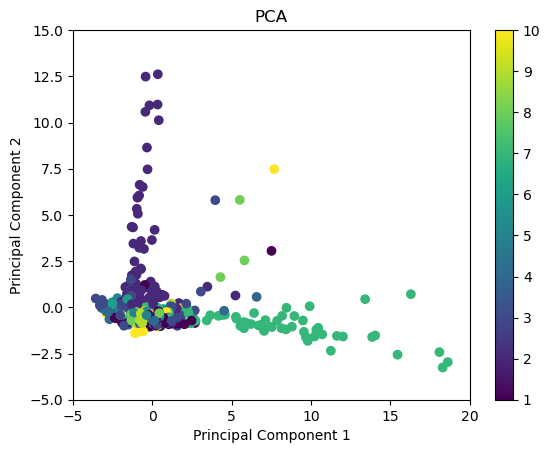

In [34]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=np.ravel(c1), cmap='viridis')

plt.colorbar()
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA')

plt.xlim([-5, 20])
plt.ylim([-5, 15])

plt.show()

# Problem 2b - PCA Scree Plot

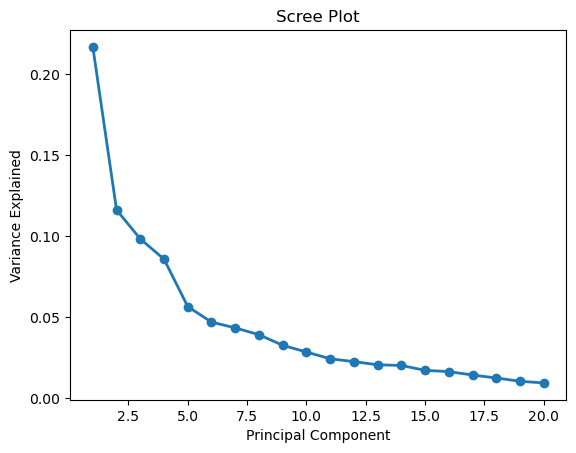

In [42]:
## https://www.statology.org/scree-plot-python/

#define PCA model to use
pca = PCA(n_components=20)

#fit PCA model to data
pca_fit = pca.fit(x1)

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

# Problem 2c - LDA

In [36]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [37]:
lda = LinearDiscriminantAnalysis(n_components = 2)
lda.fit(x1, np.ravel(c1))
lda_fit = lda.transform(x1)

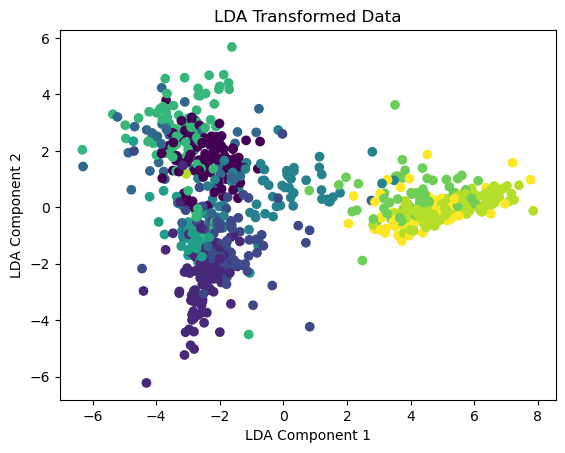

In [39]:
plt.scatter(lda_fit[:, 0], lda_fit[:, 1], c=np.ravel(c1), cmap='viridis')
plt.colorbar()
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Transformed Data')
plt.show()

# LDA Scree Plot

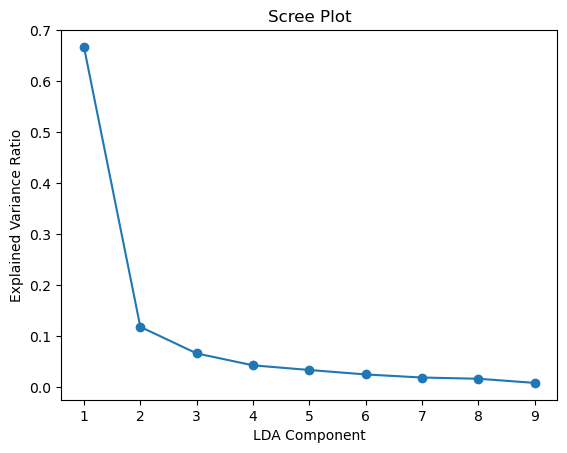

In [49]:
# Create an LDA object
lda = LinearDiscriminantAnalysis(n_components=9)

# Fit LDA to the data
lda.fit(x1, np.ravel(c1))

# Get explained variance ratios
explained_variance_ratios = lda.explained_variance_ratio_

# Create a bar plot of explained variance ratios
plt.plot(range(1, len(explained_variance_ratios) + 1), explained_variance_ratios, 'o-')
plt.xlabel('LDA Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# 3e - Isomap Dimensionality Reduction

In [50]:
from sklearn.manifold import Isomap

In [53]:
n_neighbors = 10
n_components = 2

isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components)
x1_iso = isomap.fit_transform(x1)

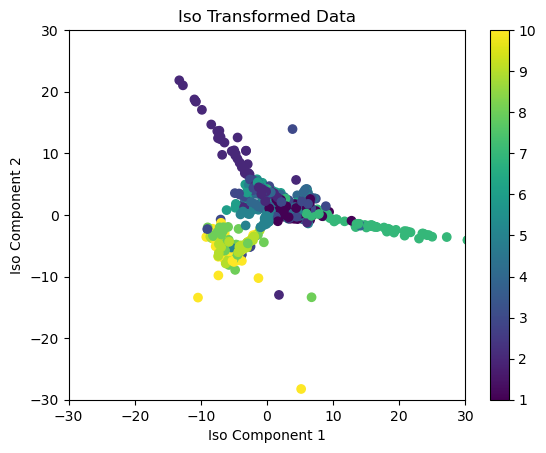

In [58]:
plt.scatter(x1_iso[:, 0], x1_iso[:, 1], c=np.ravel(c1), cmap='viridis')
plt.colorbar()
plt.xlabel('Iso Component 1')
plt.ylabel('Iso Component 2')
plt.title('Iso Transformed Data')

plt.xlim([-30, 30])
plt.ylim([-30, 30])

plt.show()